In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df["target"].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

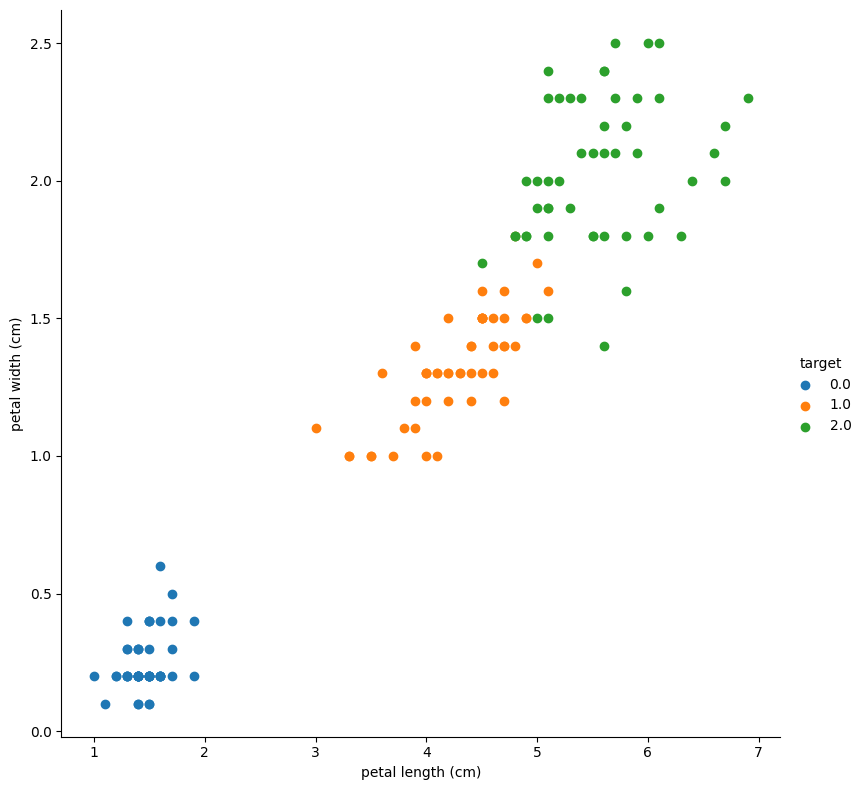

In [6]:
sns.FacetGrid(df, hue="target",height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

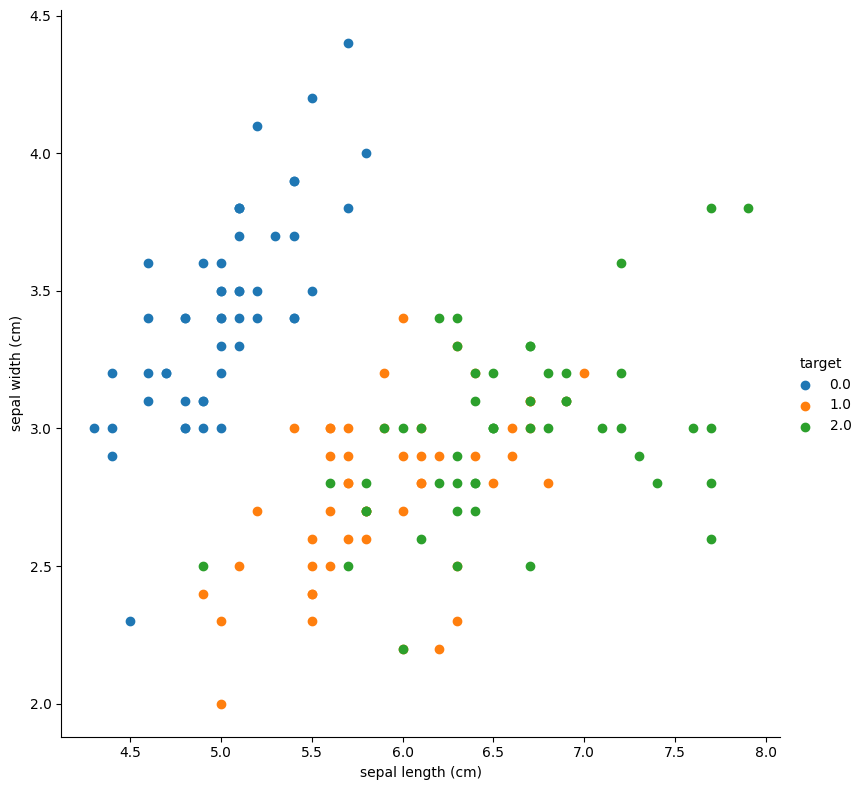

In [7]:
sns.FacetGrid(df, hue="target",height=8).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

In [8]:
# fit a SVM model to the data
from sklearn.svm import SVC
model = svm.SVC(kernel='linear', C=1, gamma=1)
model.fit(iris.data, iris.target)


SVC(C=1, gamma=1, kernel='linear')

In [9]:
model.score(iris.data, iris.target)

0.9933333333333333

In [10]:
# make predictions
expected = iris.target
predicted = model.predict(iris.data)

In [11]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [12]:
# Matriks confusion
conf_matrix = metrics.confusion_matrix(expected, predicted)

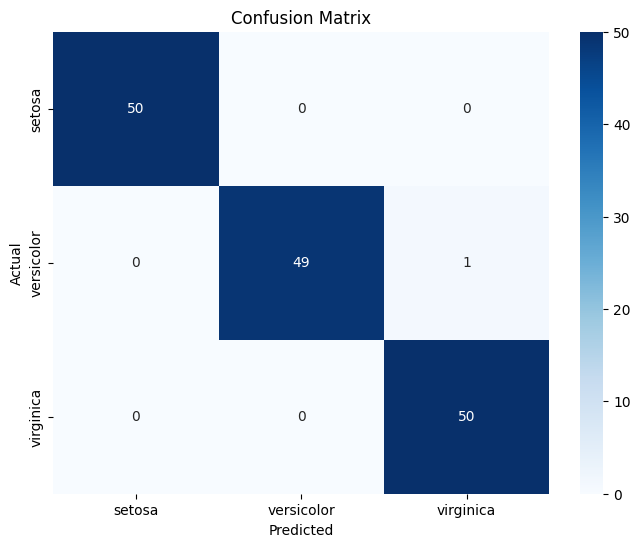

In [13]:
# Visualisasi matriks confusion menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [24]:
def MySVMClassifier( Kernel, C, Gamma):
    
    svc = svm.SVC(kernel=Kernel, C=C,gamma=Gamma)
    svc.fit(X, y)
    
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.show() 

In [25]:
from ipywidgets import interact

In [26]:
i = interact(MySVMClassifier, Kernel=['linear','rbf'],C=(0.001,100), Gamma=(1,100))

interactive(children=(Dropdown(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatSlider(v…

In [27]:
X = iris.data[:, 2:] # we only take the first two features.
y = iris.target

In [28]:
def MySVMClassifier2( Kernel, C, Gamma):
    
    svc = svm.SVC(kernel=Kernel, C=C, gamma=Gamma)
    svc.fit(X, y)
    
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.show() 

In [29]:
from ipywidgets import interact

In [30]:
i = interact(MySVMClassifier2, Kernel=['linear','rbf'], C=(0.001,100), Gamma=(1,100))

interactive(children=(Dropdown(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatSlider(v…

In [34]:
# Function to predict iris type based on user input
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    # Create a numpy array from the input
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Predict the class
    prediction = model.predict(input_data)
    
    # Map the prediction to the iris flower name
    iris_types = iris.target_names
    return iris_types[prediction][0]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

%pylab inline 
%matplotlib inline
# Get user input
try:
    sepal_length = float(input("Enter sepal length (cm): "))
    sepal_width = float(input("Enter sepal width (cm) : "))
    petal_length = float(input("Enter petal length (cm): "))
    petal_width = float(input("Enter petal width (cm) : "))
    
    # Predict and display the result
    iris_type = predict_iris(sepal_length, sepal_width, petal_length, petal_width)
    print(f"The predicted iris flower type is: {iris_type}")
except ValueError:
    print("Please enter valid numeric values.")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Enter sepal length (cm):  5.5
Enter sepal width (cm) :  3
Enter petal length (cm):  4
Enter petal width (cm) :  1.5


The predicted iris flower type is: versicolor
